In [2]:
import pandas as pd
from matplotlib import pyplot as plt

jan_22 = pd.read_csv("202201_AuxilioBrasil.csv", sep=";", encoding='latin-1')
jan_22['VALOR PARCELA'] = jan_22['VALOR PARCELA'].replace(',', '.', regex=True).astype('Float64')
jan_22[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']] = jan_22[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']].astype("str")

fev_22 = pd.read_csv("202202_AuxilioBrasil.csv", sep=";", encoding='latin-1')
fev_22['VALOR PARCELA'] = fev_22['VALOR PARCELA'].replace(',', '.', regex=True).astype(float)
fev_22[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']] = fev_22[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']].astype("str")

jan_23 = pd.read_csv("202301_AuxilioBrasil.csv", sep=";", encoding='latin-1')
jan_23['VALOR PARCELA'] = jan_23['VALOR PARCELA'].replace(',', '.', regex=True).astype(float)
jan_23[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']] = jan_23[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']].astype("str")

fev_23 = pd.read_csv("202302_AuxilioBrasil.csv", sep=";", encoding='latin-1')
fev_23['VALOR PARCELA'] = fev_23['VALOR PARCELA'].replace(',', '.', regex=True).astype(float)
fev_23[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']] = fev_23[['MÊS COMPETÊNCIA', 'MÊS REFERÊNCIA']].astype("str")

df = pd.concat([jan_22, fev_22, jan_23, fev_23])

In [3]:
# Os dados têm a seguinte estrutura

df

,MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,202201,202201,AC,643,ACRELANDIA,***.105.752-**,23688307034,ABEL DA COSTA PAULICHEN,102.0
1,202201,202201,AC,643,ACRELANDIA,***.833.642-**,16167611395,ABIGAIL DAGMAR MACHADO,385.0
2,202201,202201,AC,643,ACRELANDIA,***.050.782-**,16094443293,ABRAO KEMPNER RUMANZKI,26.0
3,202201,202201,AC,643,ACRELANDIA,***.455.212-**,16110238660,ACHILLA MARIA SOUZA ANDRADE,205.0
4,202201,202201,AC,643,ACRELANDIA,***.332.032-**,16120063855,ADALGIZA NOGUEIRA DOS SANTOS,157.0
...,...,...,...,...,...,...,...,...,...
20891229,202302,202302,TO,9643,XAMBIOA,NaN,20324328324,ZEILA MARIA BATISTA,400.0
20891230,202302,202302,TO,9643,XAMBIOA,***.597.141-**,20936381358,ZENATI RODRIGUES DA SILVA,240.0
20891231,202302,202302,TO,9643,XAMBIOA,***.273.191-**,20644881997,ZENILDE ALVES DOS SANTOS,400.0
20891232,202302,202302,TO,9643,XAMBIOA,NaN,19058661973,ZENOLIA RAMOS DA SILVA CARVALHO,400.0


In [4]:
# Cada mês teve quantos pagamentos?

print(len(jan_22))
print(len(fev_22))
print(len(jan_23))
print(len(fev_23))

17361923
17269513
21626680
20891234


In [5]:
# Qual mês teve a maior despesa?

sum_jan_22 = jan_22["VALOR PARCELA"].sum()
sum_fev_22 = fev_22["VALOR PARCELA"].sum()
sum_jan_23 = jan_23["VALOR PARCELA"].sum()
sum_fev_23 = fev_23["VALOR PARCELA"].sum()

print(sum_jan_22)
print(sum_fev_22)
print(sum_jan_23) #janeiro de 2023
print(sum_fev_23)

3672884516.0
3758585119.0
8231843937.0
7939793475.0


In [10]:
# Comparando cada mês, qual estado deu mais gasto por mês?

df1 = df[["MÊS COMPETÊNCIA","UF", "VALOR PARCELA"]].groupby(["MÊS COMPETÊNCIA", "UF"])[["VALOR PARCELA"]].sum()
df1 = df1.sort_values("VALOR PARCELA", ascending=False).groupby(["MÊS COMPETÊNCIA"]).head(1)
df1

,,VALOR PARCELA
MÊS COMPETÊNCIA,UF,
202301,SP,1016216225.0
202302,SP,973522431.0
202202,BA,456746783.0
202201,BA,445403340.0


In [7]:
# Quais foram as despesas dos estados e qual estado deu mais despesa no geral?

df[['UF', 'VALOR PARCELA']].groupby("UF").sum().sort_values("VALOR PARCELA", ascending=False)

,VALOR PARCELA
UF,
SP,2869527630.0
BA,2866658703.0
RJ,1944355100.0
PE,1868361522.0
MG,1834634207.0
CE,1686195179.0
PA,1476083938.0
MA,1395213039.0
PB,796991398.0


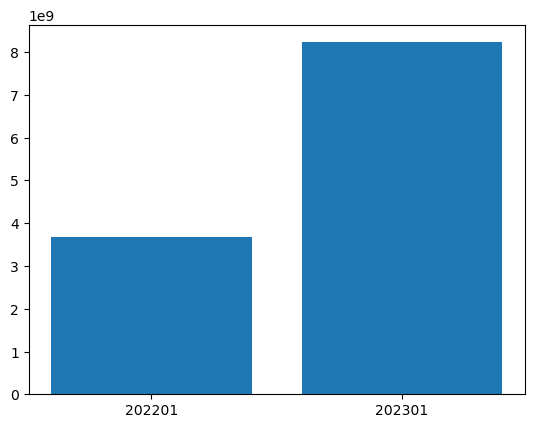

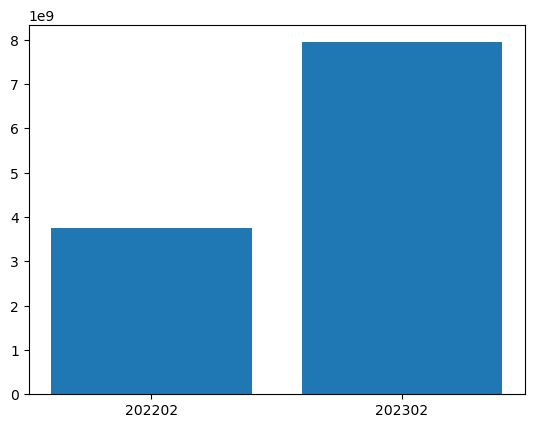

In [8]:
# Comparando jan/22 com jan/23 e fev/22 e fev/23, houve aumento ou redução de custos na comparação?

plt.bar(["202201", "202301"], [sum_jan_22, sum_jan_23])
plt.show()

plt.bar(["202202", "202302"], [sum_fev_22, sum_fev_23])
plt.show()

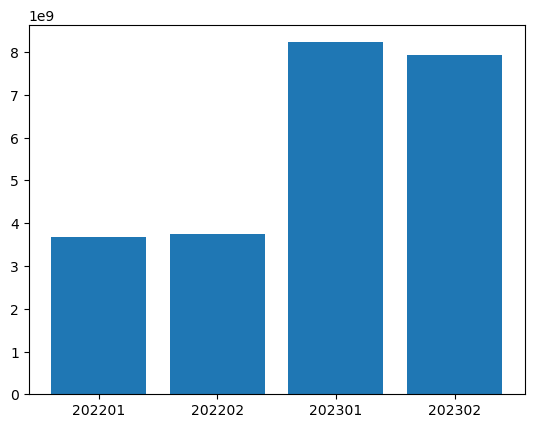

In [9]:
# Comparando jan e fev de cada ano, teve aumento ou redução na transação de um mês pro outro?

sum_list = [sum_jan_22, sum_fev_22, sum_jan_23, sum_fev_23]
date_list = ["202201","202202","202301","202302"]

plt.bar(date_list, sum_list)
plt.show()